# Comparison between MC-SPAM LDCs and limiting LDCs

As described in other notebook, due to inherent difference between two methods to derive LDCs (the one from the stellar model atmospheres and those obtained from the exoplanet transit photometry), both sets of LDCs are not directly comparable. To deal with this issue, [Howarth (2011)](https://academic.oup.com/mnras/article/418/2/1165/1071889) proposed a new way to compute LDCs from synthetic transit lightcurves which were, in turn, calculated from a more realistic stellar intensity profile --- an algorithm which was dubbed as SPAM (Synthetica-Photometry/Atmosphere Model). However, this method doesn't take into account of uncertainties present in geometrical transit parameters. [Espinoza & Jordan (2015)](https://academic.oup.com/mnras/article/450/2/1879/985166) took care of this using Monte-Carlo methods, which came to know as MC-SPAM (Monte-Carlo SPAM).

In other notebook, we described a way to compute MC-SPAM LDCs --- and we computed the same for ATLAS [Espinoza & Jordan (2015)](https://academic.oup.com/mnras/article/450/2/1879/985166) LDCs. We now want to compare these MC-SPAM LDCs to the limiting LDCs (see, [Espinoza & Jordan 2015](https://academic.oup.com/mnras/article/450/2/1879/985166)).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from matplotlib import rcParams
from pylab import *

sys.path.append('/home/jayshil/Documents/Dissertation/ld-spam')
import utils as utl

In [2]:
path1 = '/home/jayshil/Documents/Dissertation/'

# MC-SPAM LDCs
u1_mcs, u1_mcs_err, u2_mcs, u2_mcs_err = np.loadtxt(path1 + '/ld-spam/Results/MCS_Atlas_code.dat', usecols=(1,2,3,4), unpack=True)
u1_mcs_lsq, u1_mcs_lsqe, u2_mcs_lsq, u2_mcs_lsqe = np.loadtxt(path1 + '/ld-spam/Results/MCS_Atlas_code_lsq.dat', usecols=(1,2,3,4), unpack=True)

# Limiting LDCs
u1_lim, u2_lim = np.loadtxt(path1 + '/ld-project-updated/Atlas/code_limiting_LDC_ata.dat', usecols=(1,2), unpack=True)
u1_lim_err, u2_lim_err = np.zeros(len(u1_lim)), np.zeros(len(u1_lim))

In [3]:
sns.set_context("talk")
sns.set_style("ticks")

# Fonts:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
matplotlib.rcParams.update({'font.size':12})
plt.rc('legend', **{'fontsize':12})

# Ticks to the outside:
rcParams['axes.linewidth'] = 1.2 
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

Let's plot 'em...

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


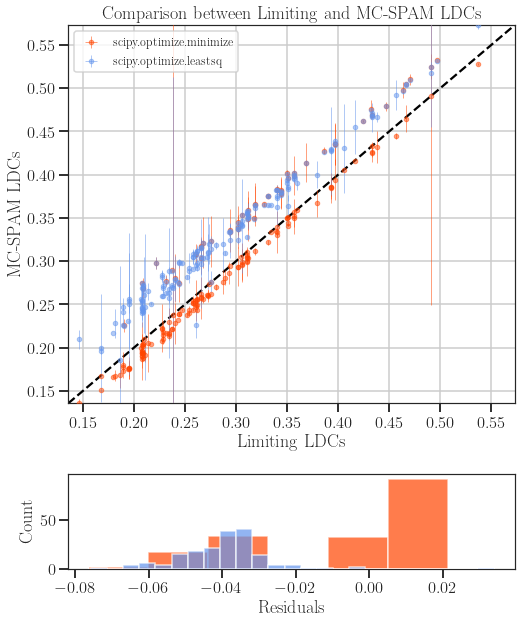

In [4]:
utl.image_double(u1_lim, u1_lim, u1_lim_err, u1_lim_err, u1_mcs, u1_mcs_lsq, u1_mcs_err, u1_mcs_lsqe, 'scipy.optimize.minimize',\
     'scipy.optimize.leastsq', 'Limiting LDCs', 'MC-SPAM LDCs', 'Comparison between Limiting and MC-SPAM LDCs')
plt.show()

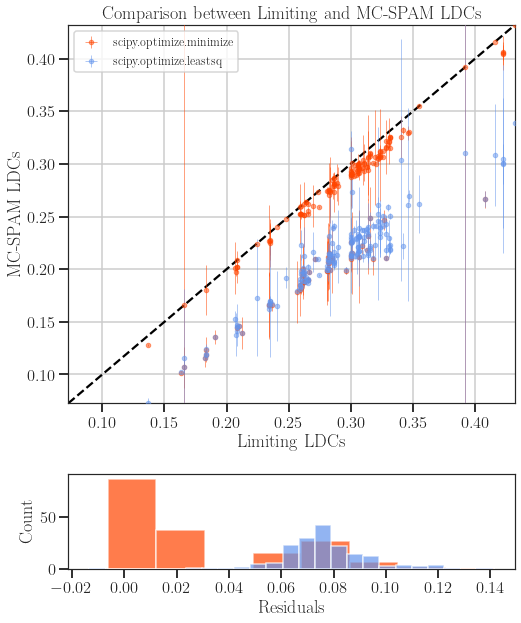

In [5]:
utl.image_double(u2_lim, u2_lim, u2_lim_err, u2_lim_err, u2_mcs, u2_mcs_lsq, u2_mcs_err, u2_mcs_lsqe, 'scipy.optimize.minimize',\
     'scipy.optimize.leastsq', 'Limiting LDCs', 'MC-SPAM LDCs', 'Comparison between Limiting and MC-SPAM LDCs')
plt.show()